# STORESALES PREDICTION USING TIMESERIES

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime as dt
import seaborn as sns
import warnings
import sys
warnings.simplefilter(action='ignore')
sys.path.append("../")



In [140]:
train = pd.read_csv('train.csv',low_memory = False)


In [141]:
train.head()

,DaystoShipActual,ShipStatus,DaystoShipScheduled,Category,City,Country,CustomerName,DiscountPercent,NumberofRecords,OrderDate,...,Quantity,Region,Returned,ProfitperOrder,Sales,Segment,ShipDate,ShipMode,State,SubCategory
0,3,Shipped On Time,3,Furniture,Henderson,United States,Claire Gute,0.00%,1,2018-11-08,...,2,South,NaN,41.91,262,Consumer,2018-11-11,Second Class,Kentucky,Bookcases
1,3,Shipped On Time,3,Furniture,Henderson,United States,Claire Gute,0.00%,1,2018-11-08,...,3,South,NaN,219.58,732,Consumer,2018-11-11,Second Class,Kentucky,Chairs
2,4,Shipped Late,3,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00%,1,2018-06-12,...,2,West,NaN,6.87,15,Corporate,2018-06-16,Second Class,California,Labels
3,7,Shipped Late,6,Furniture,Fort Lauderdale,United States,Sean ODonnell,45.00%,1,2017-10-11,...,5,South,NaN,-383.03,958,Consumer,2017-10-18,Standard Class,Florida,Tables
4,7,Shipped Late,6,Office Supplies,Fort Lauderdale,United States,Sean ODonnell,20.00%,1,2017-10-11,...,2,South,NaN,2.52,22,Consumer,2017-10-18,Standard Class,Florida,Storage


In [142]:
train.shape


(12420, 26)

In [143]:
train.columns


Index(['DaystoShipActual', 'ShipStatus', 'DaystoShipScheduled', 'Category',
       'City', 'Country', 'CustomerName', 'DiscountPercent', 'NumberofRecords',
       'OrderDate', 'OrderID', 'Sales Person', 'PostalCode', 'ProductId',
       'ProductName', 'Profit', 'Quantity', 'Region', 'Returned',
       'ProfitperOrder', 'Sales', 'Segment', 'ShipDate', 'ShipMode', 'State',
       'SubCategory'],
      dtype='object')

In [144]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DaystoShipActual     12420 non-null  int64  
 1   ShipStatus           12420 non-null  object 
 2   DaystoShipScheduled  12420 non-null  int64  
 3   Category             12420 non-null  object 
 4   City                 12420 non-null  object 
 5   Country              12420 non-null  object 
 6   CustomerName         12420 non-null  object 
 7   DiscountPercent      12420 non-null  object 
 8   NumberofRecords      12420 non-null  int64  
 9   OrderDate            12420 non-null  object 
 10  OrderID              12420 non-null  object 
 11  Sales Person         12420 non-null  object 
 12  PostalCode           12409 non-null  float64
 13  ProductId            12420 non-null  int64  
 14  ProductName          12420 non-null  object 
 15  Profit               12420 non-null 

In [145]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
DaystoShipActual,12420.0,3.913285,1.830695,0.00,3.00,4.00,5.00,7.00
DaystoShipScheduled,12420.0,4.238406,2.242721,0.00,3.00,6.00,6.00,6.00
NumberofRecords,12420.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
PostalCode,12409.0,57417.516480,32749.815711,1040.00,24153.00,60623.00,90045.00,99301.00
ProductId,12420.0,936.830757,530.520886,2.00,494.00,920.00,1406.00,1850.00
Profit,12420.0,28.991868,246.504568,-6600.00,2.00,9.00,29.00,8400.00
Quantity,12420.0,3.785024,2.231328,1.00,2.00,3.00,5.00,14.00
ProfitperOrder,12420.0,28.995841,246.506718,-6599.98,1.97,9.07,29.37,8399.98
Sales,12420.0,233.646216,620.765077,0.00,18.00,55.00,213.00,22638.00


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DaystoShipActual     12420 non-null  int64  
 1   ShipStatus           12420 non-null  object 
 2   DaystoShipScheduled  12420 non-null  int64  
 3   Category             12420 non-null  object 
 4   City                 12420 non-null  object 
 5   Country              12420 non-null  object 
 6   CustomerName         12420 non-null  object 
 7   DiscountPercent      12420 non-null  object 
 8   NumberofRecords      12420 non-null  int64  
 9   OrderDate            12420 non-null  object 
 10  OrderID              12420 non-null  object 
 11  Sales Person         12420 non-null  object 
 12  PostalCode           12409 non-null  float64
 13  ProductId            12420 non-null  int64  
 14  ProductName          12420 non-null  object 
 15  Profit               12420 non-null 

In [147]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

DaystoShipActual          8
ShipStatus                3
DaystoShipScheduled       4
Category                  3
City                    531
Country                   1
CustomerName            793
DiscountPercent          12
NumberofRecords           1
OrderDate              1236
OrderID                5009
Sales Person              4
PostalCode              631
ProductId              1735
ProductName            1849
Profit                  755
Quantity                 14
Region                    4
Returned                  2
ProfitperOrder         5157
Sales                  1148
Segment                   3
ShipDate               1334
ShipMode                  4
State                    49
SubCategory              17
dtype: int64

In [148]:
# check for null values
train.isnull().sum()

DaystoShipActual          0
ShipStatus                0
DaystoShipScheduled       0
Category                  0
City                      0
Country                   0
CustomerName              0
DiscountPercent           0
NumberofRecords           0
OrderDate                 0
OrderID                   0
Sales Person              0
PostalCode               11
ProductId                 0
ProductName               0
Profit                    0
Quantity                  0
Region                    0
Returned               9194
ProfitperOrder            0
Sales                     0
Segment                   0
ShipDate                  0
ShipMode                  0
State                     0
SubCategory               0
dtype: int64

In [149]:
data_ts = train[['OrderDate','Sales']]
data_ts

,OrderDate,Sales
0,2018-11-08,262
1,2018-11-08,732
2,2018-06-12,15
3,2017-10-11,958
4,2017-10-11,22
...,...,...
12415,2019-11-21,660
12416,2019-11-21,660
12417,2019-11-21,660
12418,2019-11-21,660


In [150]:
data_ts.describe()

,Sales
count,12420.000000
mean,233.646216
std,620.765077
min,0.000000
25%,18.000000
50%,55.000000
75%,213.000000
max,22638.000000


In [151]:
data_ts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderDate  12420 non-null  object
 1   Sales      12420 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 194.2+ KB


In [152]:
data_ts['OrderDate'] = pd.to_datetime(data_ts['OrderDate'])
data_ts

,OrderDate,Sales
0,2018-11-08,262
1,2018-11-08,732
2,2018-06-12,15
3,2017-10-11,958
4,2017-10-11,22
...,...,...
12415,2019-11-21,660
12416,2019-11-21,660
12417,2019-11-21,660
12418,2019-11-21,660


In [153]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12420 entries, 0 to 12419
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  12420 non-null  datetime64[ns]
 1   Sales      12420 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 194.2 KB


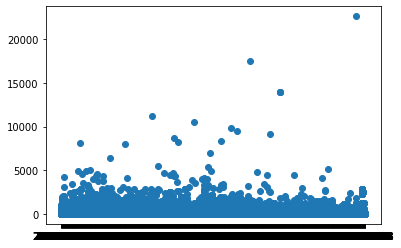

In [154]:
plt.scatter(train['OrderDate'],train['Sales'])

In [155]:
data_ts = data_ts.sort_values(by="OrderDate")

In [156]:
data_ts

,OrderDate,Sales
3191,2016-01-03,16
969,2016-01-04,4
968,2016-01-04,273
967,2016-01-04,12
3718,2016-01-05,20
...,...,...
1625,2019-12-30,323
873,2019-12-30,209
3725,2019-12-30,53
4497,2019-12-30,3


In [157]:
data_ts.reset_index(inplace = True)


In [158]:
data_ts = data_ts.drop(columns=['index'])

In [159]:
data_ts

,OrderDate,Sales
0,2016-01-03,16
1,2016-01-04,4
2,2016-01-04,273
3,2016-01-04,12
4,2016-01-05,20
...,...,...
12415,2019-12-30,323
12416,2019-12-30,209
12417,2019-12-30,53
12418,2019-12-30,3


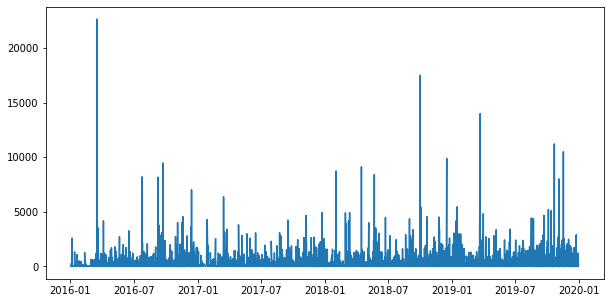

In [160]:
plt.figure(figsize=(10,5))
plt.plot(data_ts['OrderDate'],data_ts['Sales'])
plt.show()

<AxesSubplot:xlabel='Sales'>

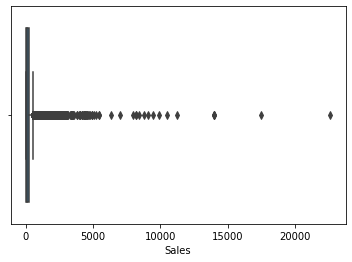

In [161]:
sns.boxplot(data_ts['Sales'])

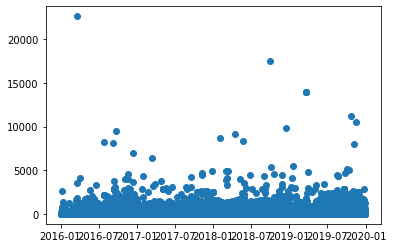

In [162]:
plt.scatter(data_ts['OrderDate'],data_ts['Sales'])


In [163]:
data_ts = data_ts.groupby(['OrderDate']).sum()

In [164]:
data_ts

,Sales
OrderDate,
2016-01-03,16
2016-01-04,289
2016-01-05,20
2016-01-06,4407
2016-01-07,87
...,...
2019-12-26,815
2019-12-27,177
2019-12-28,1762


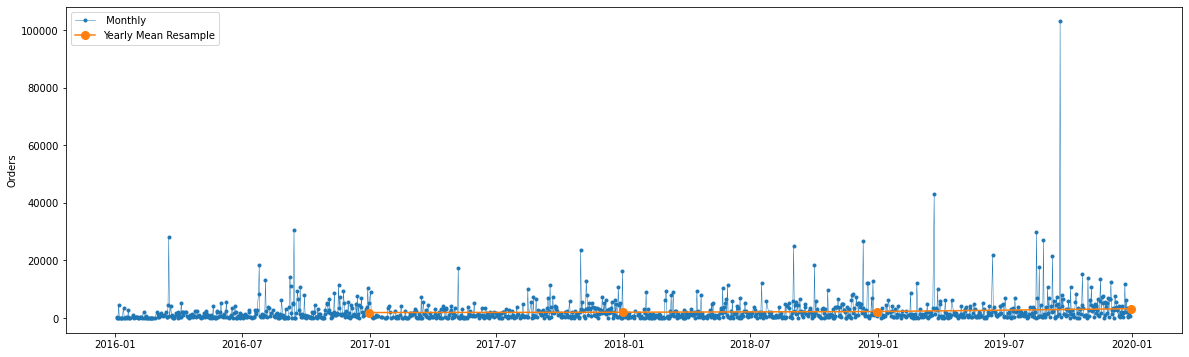

In [165]:
y = data_ts['Sales']

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label=' Monthly')
ax.plot(y.resample('y').mean(),marker='o', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Orders')
ax.legend()

In [166]:
from statsmodels.tsa.stattools import adfuller

In [167]:
def timeseries():
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    plt.figure(figsize=(20,6))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.tittle('Rolling Mean and Standard Deviation')
    plt.show(block=False)

#dickey fueller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolad = 'ATC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%)'%key] = value
    print(dfoutput.round(2))    

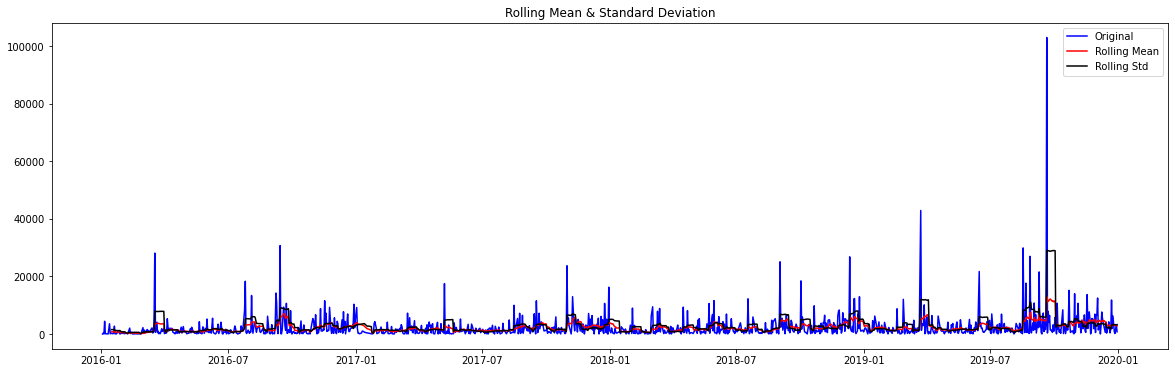

Results of Dickey-Fuller Test:
Test Statistic                   -7.75
p-value                           0.00
#Lags Used                       10.00
Number of Observations Used    1225.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [168]:
testing(data_ts)

In [169]:
ts_log = np.log(data_ts)

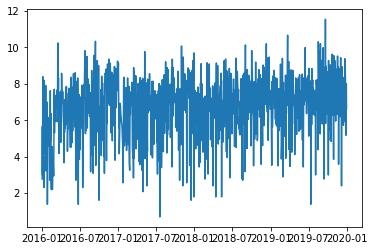

In [170]:
plt.plot(ts_log)

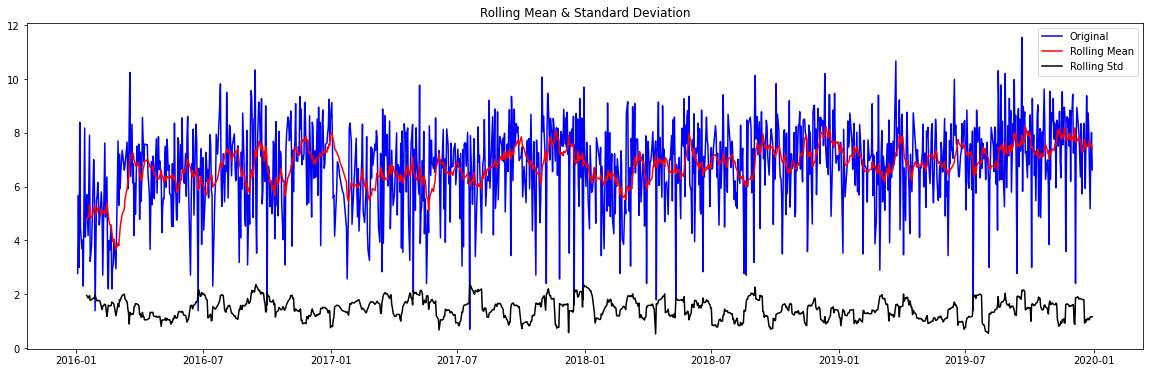

Results of Dickey-Fuller Test:
Test Statistic                   -6.24
p-value                           0.00
#Lags Used                       12.00
Number of Observations Used    1223.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [171]:
testing(ts_log)

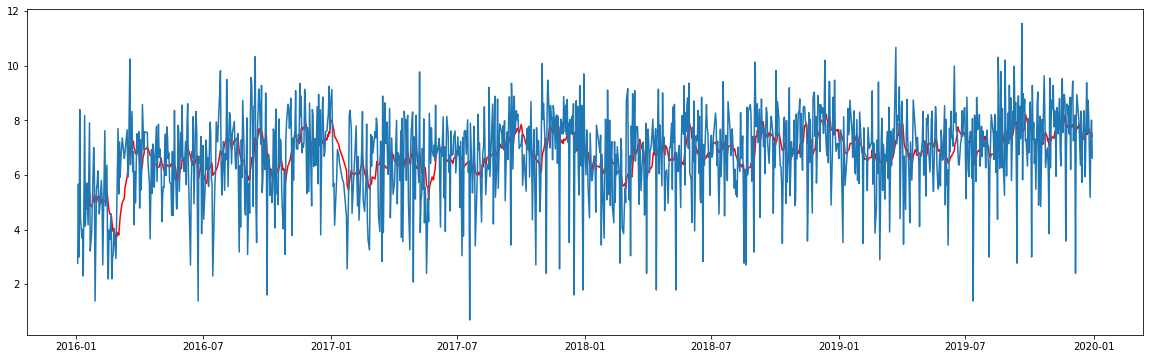

In [172]:
mov_avg = ts_log.rolling(window=12).mean()
plt.figure(figsize=(20,6))
plt.plot(mov_avg,c='r')
plt.plot(ts_log)
plt.show()

In [173]:
ts_log_moving_avg_diff = ts_log - mov_avg
ts_log_moving_avg_diff.head(20)

,Sales
OrderDate,
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-09,NaN
2016-01-10,NaN
2016-01-11,NaN
2016-01-13,NaN


In [174]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [175]:
ts_log_moving_avg_diff

,Sales
OrderDate,
2016-01-16,0.928134
2016-01-18,-0.718078
2016-01-19,1.020057
2016-01-20,2.581800
2016-01-21,-1.674129
...,...
2019-12-26,-0.851949
2019-12-27,-2.333096
2019-12-28,-0.047133


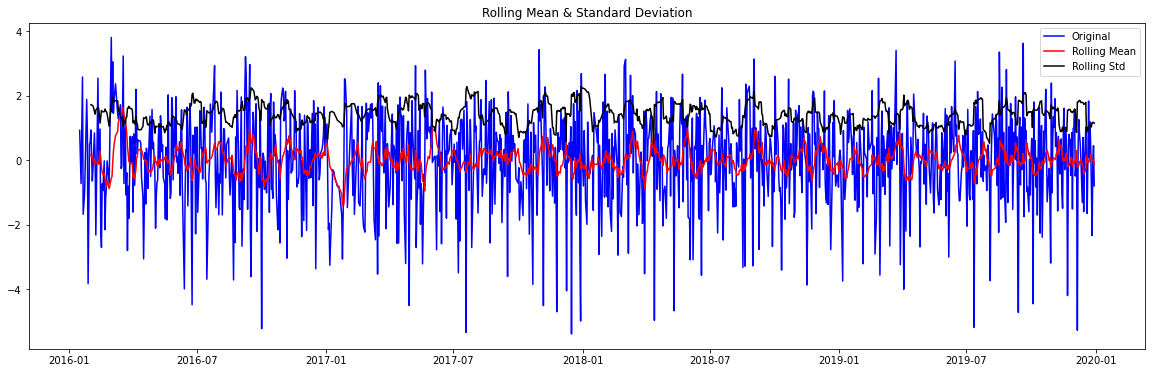

Results of Dickey-Fuller Test:
Test Statistic                  -13.98
p-value                           0.00
#Lags Used                       10.00
Number of Observations Used    1214.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [176]:
testing(ts_log_moving_avg_diff)

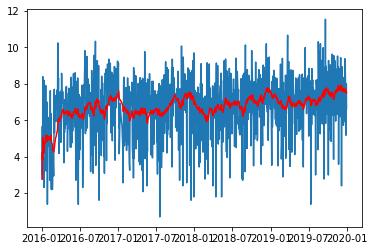

In [177]:
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

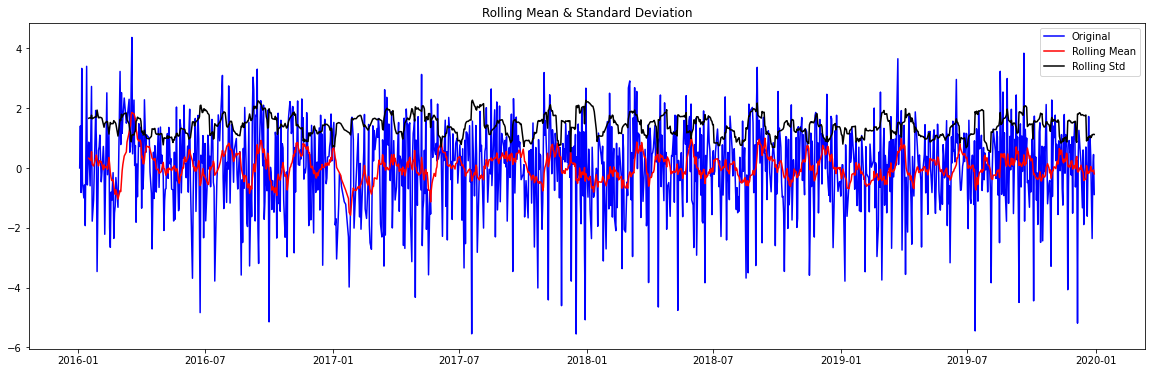

Results of Dickey-Fuller Test:
Test Statistic                  -34.87
p-value                           0.00
#Lags Used                        0.00
Number of Observations Used    1235.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [178]:
ts_log_ewma_diff = ts_log - expweighted_avg
testing(ts_log_ewma_diff)

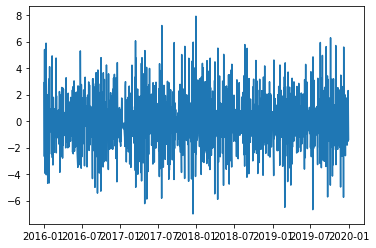

In [179]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

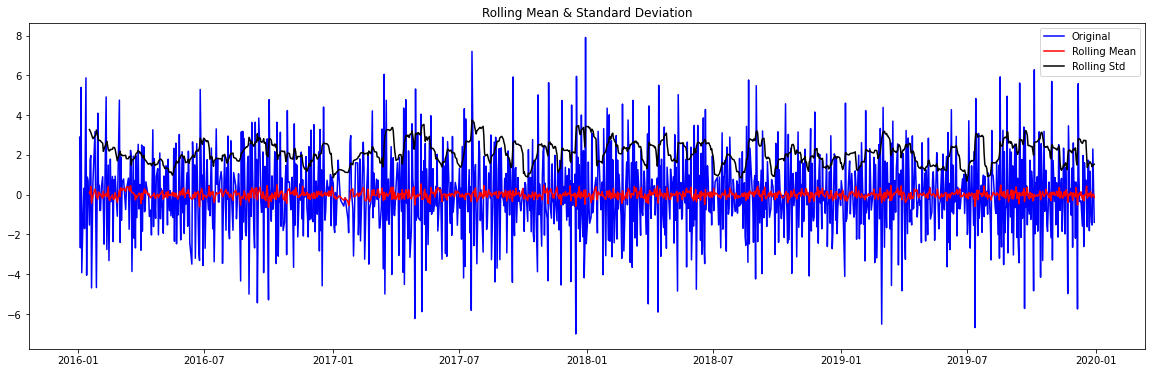

Results of Dickey-Fuller Test:
Test Statistic                  -12.68
p-value                           0.00
#Lags Used                       19.00
Number of Observations Used    1215.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [180]:
ts_log_diff.dropna(inplace=True)
testing(ts_log_diff)

In [181]:
from statsmodels.tsa.stattools import acf, pacf

In [182]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [184]:
from statsmodels.tsa.arima_model import ARIMA

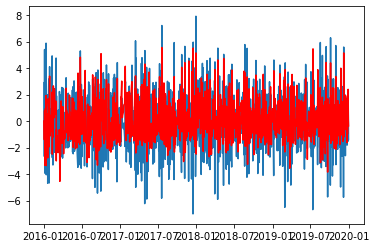

In [185]:
model = ARIMA(ts_log, order=(1,1,1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

In [186]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

OrderDate
2016-01-04    0.002033
2016-01-05   -1.410257
2016-01-06    0.787523
2016-01-07   -3.339637
2016-01-09    0.382073
dtype: float64

In [187]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

OrderDate
2016-01-04    0.002033
2016-01-05   -1.408224
2016-01-06   -0.620701
2016-01-07   -3.960338
2016-01-09   -3.578265
dtype: float64

In [188]:
predictions_ARIMA_log = pd.Series(ts_log.Sales, index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

OrderDate
2016-01-03    2.772589
2016-01-04    5.668460
2016-01-05    1.587508
2016-01-06    7.770248
2016-01-07    0.505570
dtype: float64

In [189]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.round(2)

OrderDate
2016-01-03      16.00
2016-01-04     289.59
2016-01-05       4.89
2016-01-06    2369.06
2016-01-07       1.66
               ...   
2019-12-26       0.01
2019-12-27       0.00
2019-12-28       0.46
2019-12-29       0.91
2019-12-30       0.16
Length: 1236, dtype: float64

In [190]:
my_pred = pd.DataFrame(predictions_ARIMA)

In [191]:
my_pred

,0
OrderDate,
2016-01-03,16.000000
2016-01-04,289.588216
2016-01-05,4.891545
2016-01-06,2369.059365
2016-01-07,1.657931
...,...
2019-12-26,0.007213
2019-12-27,0.004228
2019-12-28,0.461063


In [192]:
my_pred.columns = ['Value']

In [193]:
my_pred

,Value
OrderDate,
2016-01-03,16.000000
2016-01-04,289.588216
2016-01-05,4.891545
2016-01-06,2369.059365
2016-01-07,1.657931
...,...
2019-12-26,0.007213
2019-12-27,0.004228
2019-12-28,0.461063


In [194]:
predictions_ARIMA_show = my_pred[my_pred['Value']>40000]
predictions_ARIMA_show.round(3)

,Value
OrderDate,
2016-03-01,697721.567
2019-06-08,80924.581
2019-06-10,59495.966
2019-08-17,120629.422


In [195]:
my_pred.drop(my_pred.loc[my_pred['Value'] >40000].index, inplace=True)

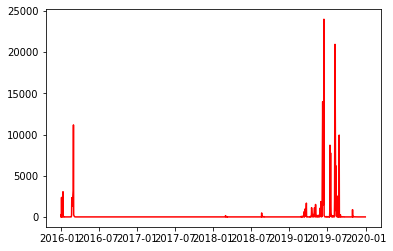

In [196]:
plt.plot(my_pred,c = 'r')

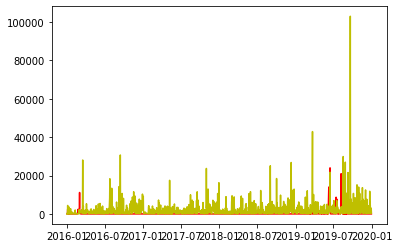

In [197]:
plt.plot(my_pred,c = 'r')
plt.plot(data_ts, c='y')